Step 1: Preparing for Your Proposal

1. Selected the **Sportstats** dataset. Mainly selected because the dataset is small and hence it will be easier to move data and wont be an issue when loaded into ram compared to the other datasets.

In [1]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=879732d0a042d47fbfd806164c69038715417409e62cd426bc6b309866d85131
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [35]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pysqldf = lambda q: sqldf(q, globals())

athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

### noc_regions dataset

In [18]:
pysqldf('''
SELECT * 
from noc_regions
limit 5
''')

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None


In [16]:
pysqldf('''
SELECT count(*) as count_,
count(distinct region) as count_region_,
count(distinct noc) as count_noc_,
count(distinct notes) as count_notes_
from noc_regions
''')

,count_,count_region_,count_noc_,count_notes_
0,230,206,230,21


In [14]:
pysqldf('''
SELECT *
from noc_regions as nr
WHERE nr.region IS NULL
OR nr.NOC IS NULL
''')

,NOC,region,notes
0,ROT,None,Refugee Olympic Team
1,TUV,None,Tuvalu
2,UNK,None,Unknown


In [17]:
pysqldf('''
SELECT count(*)-count(noc) as null_noc, 
count(*)-count(region) as null_region,
count(*)-count(notes) as null_notes
from noc_regions
''')

,null_noc,null_region,null_notes
0,0,3,209


In [78]:
pysqldf('''
SELECT
region, 
count(*) as noc_count
from noc_regions
where region IS NOT NULL
GROUP BY region
HAVING noc_count>1
ORDER BY noc_count DESC
''')

,region,noc_count
0,Germany,4
1,Czech Republic,3
2,Malaysia,3
3,Russia,3
4,Serbia,3
5,Yemen,3
6,Australia,2
7,Canada,2
8,China,2
9,Greece,2


* In noc_regions dataset there are total of 230 rows, with 230 unique NOC code, 206 unique regions, and 21 unique notes.
* There are 3/230 null values in region, 209/230 null values in notes, 0/230 null values in NOC.
* So we can ignore the notes column because they dont provide that much of an information.
* 14 regions have more than 1 noc. Germany has the maximum with 4 noc followed by Czeck, Malaysia, Serbia
* The multiple nocs might be because of changes in the country, like for example germany was east germany and west germany before and so on.

### athlete_events dataset

In [23]:
pysqldf('''
SELECT * 
from athlete_events
limit 5
''')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [26]:
pysqldf('''
SELECT count(*) as count_
from athlete_events
''')

,count_
0,271116


In [37]:
pysqldf('''
SELECT 
count(*)-count(name) as null_name,
count(*)-count(sex) as null_sex,
count(*)-count(age) as null_age,
count(*)-count(height) as null_height,
count(*)-count(weight) as null_weight,
count(*)-count(team) as null_team,
count(*)-count(noc) as null_noc,
count(*)-count(games) as null_games,
count(*)-count(year) as null_year,
count(*)-count(season) as null_season,
count(*)-count(city) as null_city,
count(*)-count(sport) as null_sport,
count(*)-count(event) as null_event,
count(*)-count(medal) as null_medal
from athlete_events
''')

,null_name,null_sex,null_age,null_height,null_weight,null_team,null_noc,null_games,null_year,null_season,null_city,null_sport,null_event,null_medal
0,0,0,9474,60171,62875,0,0,0,0,0,0,0,0,231333


In [50]:
pysqldf('''
SELECT 
games,
count(distinct event) as count_event 
from athlete_events
group by games
order by count_event desc 
limit 5
''')

,Games,count_event
0,2016 Summer,306
1,2008 Summer,302
2,2012 Summer,302
3,2004 Summer,301
4,2000 Summer,300


In [45]:
pysqldf('''
SELECT 
count(distinct name) as total_name, 
count(distinct sex) as total_sex ,
count(distinct noc) as total_noc ,
count(distinct games) as total_games, 
count(distinct event) as total_event 
from athlete_events
''')

,total_name,total_sex,total_noc,total_games,total_event
0,134732,2,230,51,765


In [48]:
pysqldf('''
SELECT distinct games
from athlete_events
where games like '%Summer'
order by games
''')

,Games
0,1896 Summer
1,1900 Summer
2,1904 Summer
3,1906 Summer
4,1908 Summer
5,1912 Summer
6,1920 Summer
7,1924 Summer
8,1928 Summer
9,1932 Summer


In [49]:
pysqldf('''
SELECT distinct games
from athlete_events
where games like '%Winter'
order by games
''')

,Games
0,1924 Winter
1,1928 Winter
2,1932 Winter
3,1936 Winter
4,1948 Winter
5,1952 Winter
6,1956 Winter
7,1960 Winter
8,1964 Winter
9,1968 Winter


* Total of about 271k olympic participants.
* 9k nulls in age, 60k height, 62k weights.
* Age height and weight not considered for further analysis.
* Team, year, season, city, sport is also not required as these might be containing redundant data.
* Important columns are **name, sex, noc, games, event, medal**
* Consists of last 29 summer olympics and last 22 winter olympics.

In [60]:
pysqldf('''
SELECT 
games,
event,
noc,
count(medal) as medal_count
from athlete_events
where medal like 'Gold'
group by games, event
order by medal_count desc
''')

,Games,Event,NOC,medal_count
0,1908 Summer,Gymnastics Men's Team All-Around,SWE,38
1,1920 Summer,Gymnastics Men's Team All-Around,ITA,27
2,1912 Summer,"Gymnastics Men's Team All-Around, Free System",NOR,24
3,1912 Summer,"Gymnastics Men's Team All-Around, Swedish System",SWE,24
4,1920 Summer,"Gymnastics Men's Team All-Around, Swedish System",SWE,24
...,...,...,...,...
6141,2016 Summer,"Wrestling Women's Flyweight, Freestyle",JPN,1
6142,2016 Summer,"Wrestling Women's Heavyweight, Freestyle",CAN,1
6143,2016 Summer,"Wrestling Women's Light-Heavyweight, Freestyle",JPN,1
6144,2016 Summer,"Wrestling Women's Lightweight, Freestyle",JPN,1


* There are cases when a team got as many medals as 38 like for gymnastics.

SummerOlympics - Event count across time
[304.8 306.1 307.4 308.7 310.  311.3]


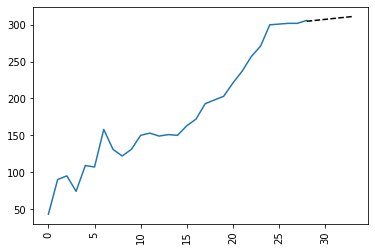

In [56]:
import matplotlib.pyplot as plt
grouped = athlete_events.groupby('Season')
for a,b in grouped:
    print(a+'Olympics - Event count across time')
    grouped2 = b.groupby('Games').nunique()['Event'].reset_index().sort_values(by='Games',ascending=True)
    
    fit = np.polyfit(np.arange(len(grouped2))[-5:],grouped2['Event'].values[-5:],1)
    line = np.poly1d(fit)
    new_points = np.arange(len(grouped2)-1,5+len(grouped2))

    print(line(new_points))
    plt.plot(list(range(len(grouped2))),grouped2['Event'])
    plt.plot(list(range(len(grouped2)-1,5+len(grouped2))),line(new_points),'k--')
    plt.xticks(rotation=90)
    plt.show()
    break

WinterOlympics - Event count across time
[ 96.4 103.2 110.  116.8 123.6 130.4]


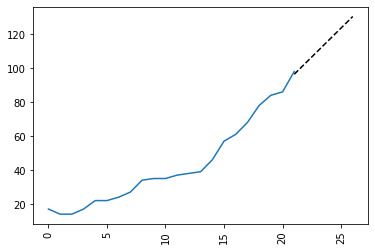

In [57]:
import matplotlib.pyplot as plt
grouped = athlete_events.groupby('Season')
flag=0
for a,b in grouped:
    if flag==0:
        flag=1
        continue
    print(a+'Olympics - Event count across time')
    grouped2 = b.groupby('Games').nunique()['Event'].reset_index().sort_values(by='Games',ascending=True)

    fit = np.polyfit(np.arange(len(grouped2))[-5:],grouped2['Event'].values[-5:],1)
    line = np.poly1d(fit)
    new_points = np.arange(len(grouped2)-1,5+len(grouped2))

    print(line(new_points))
    plt.plot(list(range(len(grouped2))),grouped2['Event'])
    plt.plot(list(range(len(grouped2)-1,5+len(grouped2))),line(new_points),'k--')
    plt.xticks(rotation=90)
    plt.show()
    break

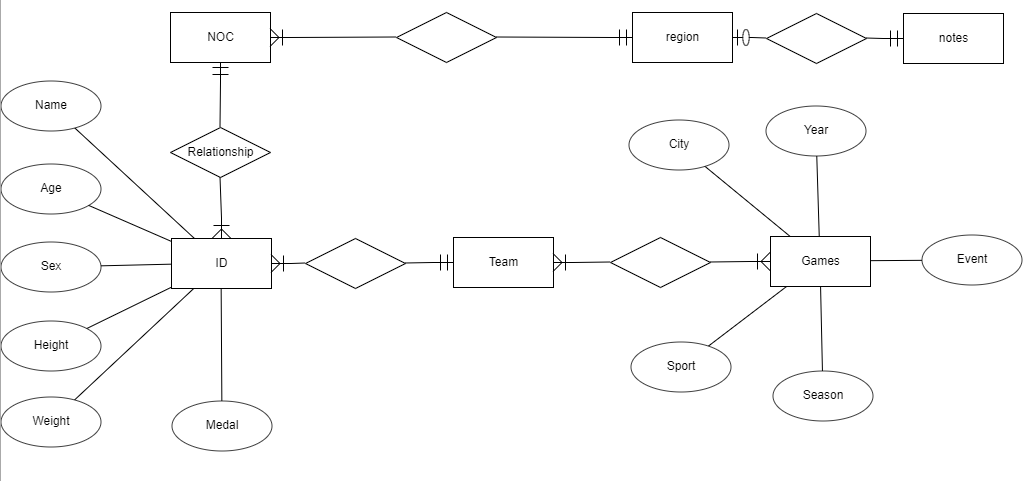


# Project Proposal
In this project, I would analyze about the woman participation throughout the olympics. 

Questions
Q1: Did the woman participation increase throughout the years?
Q2: Is there a difference between ratio in Winter and Summer olympics?
Q3: Is the woman participation ratio same across all countries?

Hypotheses
H1: Yes
H2: Both will be same
H3: No, the woman participation would be less in strict orthodox countries while it would be greater in free countries.

Approach
A1: plot graphs suggesting the percent increase in woman events.
A2: Corelation coefficient of woman events between winter and summer olympics.
A3: check current ratios of participation of different countries.

# PART 2

In [4]:
pysqldf('''
SELECT 
name,sex,noc,games,event,medal
FROM athlete_events
limit 5
''')

,Name,Sex,NOC,Games,Event,Medal
0,A Dijiang,M,CHN,1992 Summer,Basketball Men's Basketball,None
1,A Lamusi,M,CHN,2012 Summer,Judo Men's Extra-Lightweight,None
2,Gunnar Nielsen Aaby,M,DEN,1920 Summer,Football Men's Football,None
3,Edgar Lindenau Aabye,M,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,NED,1988 Winter,Speed Skating Women's 500 metres,None


# Women participation

In [26]:
pysqldf('''
SELECT
games,
1-avg(cate_sex) as women_percent,
sum(cate_sex) as men_count,
count(cate_sex)-sum(cate_sex) as women_count
FROM
(
SELECT
    games, 
    CASE 
        WHEN sex=='M' THEN 1
        ELSE 0
    END as cate_sex
FROM athlete_events
WHERE games LIKE '%Summer'
) as data2
GROUP BY Games
ORDER BY Games ASC
''')

,games,women_percent,men_count,women_count
0,1896 Summer,0.000000,380,0
1,1900 Summer,0.017045,1903,33
2,1904 Summer,0.012298,1285,16
3,1906 Summer,0.006347,1722,11
4,1908 Summer,0.015156,3054,47
5,1912 Summer,0.021535,3953,87
6,1920 Summer,0.031221,4158,134
7,1924 Summer,0.046627,4989,244
8,1928 Summer,0.080929,4588,404
9,1932 Summer,0.116874,2622,347


In [27]:
pysqldf('''
SELECT
games,
1-avg(cate_sex) as women_percent,
sum(cate_sex) as men_count,
count(cate_sex)-sum(cate_sex) as women_count
FROM
(
SELECT
    games, 
    CASE 
        WHEN sex=='M' THEN 1
        ELSE 0
    END as cate_sex
FROM athlete_events
WHERE games LIKE '%Winter'
) as data2
GROUP BY Games
ORDER BY Games ASC
''')

,games,women_percent,men_count,women_count
0,1924 Winter,0.036957,443,17
1,1928 Winter,0.056701,549,33
2,1932 Winter,0.062500,330,22
3,1936 Winter,0.090503,814,81
4,1948 Winter,0.123721,942,133
5,1952 Winter,0.170037,903,185
6,1956 Winter,0.188217,1061,246
7,1960 Winter,0.264337,821,295
8,1964 Winter,0.227222,1374,404
9,1968 Winter,0.219989,1475,416


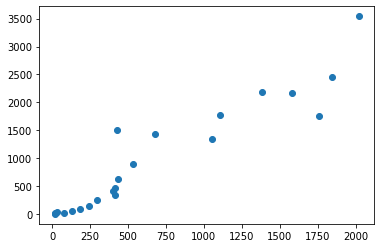

(0.9417664833453214, 6.357273100825465e-11)

In [34]:
a = [17,33,22,81,133,185,246,295,404,416,415,434,430,536,680,1054,1105,1384,1582,1757,1847,2023]
b = [0,33,16,11,47,87,134,244,404,347,468,628,1497,893,1435,1348,1777,2193,2172,1756,2447,3543,4124,5008,5431,5546,5816,5815,6223]

plt.scatter(a,b[:22])
plt.show()

from scipy.stats import pearsonr

pearsonr(a,b[:22])

## Events for women

In [23]:
pysqldf('''
SELECT
games,
1-avg(cate_event) as women_event_percent,
sum(cate_event) as men_events,
count(cate_event)-sum(cate_event) as women_events

FROM
(
SELECT
    games, 
    event,
    CASE 
        WHEN event LIKE '%Women%' THEN 0
        ELSE 1
    END as cate_event
FROM athlete_events
WHERE games LIKE '%Summer'
GROUP BY Games, event
) as data2
GROUP BY Games
ORDER BY Games
''')

,games,women_event_percent,men_events,women_events
0,1896 Summer,0.000000,43,0
1,1900 Summer,0.022222,88,2
2,1904 Summer,0.031579,92,3
3,1906 Summer,0.013514,73,1
4,1908 Summer,0.036697,105,4
5,1912 Summer,0.046729,102,5
6,1920 Summer,0.050633,150,8
7,1924 Summer,0.076336,121,10
8,1928 Summer,0.114754,108,14
9,1932 Summer,0.106870,117,14


In [28]:
pysqldf('''
SELECT
games,
1-avg(cate_event) as women_event_percent,
sum(cate_event) as men_events,
count(cate_event)-sum(cate_event) as women_events

FROM
(
SELECT
    games, 
    event,
    CASE 
        WHEN event LIKE '%Women%' THEN 0
        ELSE 1
    END as cate_event
FROM athlete_events
WHERE games LIKE '%Winter'
GROUP BY Games, event
) as data2
GROUP BY Games
ORDER BY Games
''')

,games,women_event_percent,men_events,women_events
0,1924 Winter,0.058824,16,1
1,1928 Winter,0.071429,13,1
2,1932 Winter,0.071429,13,1
3,1936 Winter,0.117647,15,2
4,1948 Winter,0.181818,18,4
5,1952 Winter,0.227273,17,5
6,1956 Winter,0.250000,18,6
7,1960 Winter,0.370370,17,10
8,1964 Winter,0.352941,22,12
9,1968 Winter,0.342857,23,12


1.

* Checked the percentage of women participation. It increased from 0% in 1896 summer olympics to 45.26% in 2016 summer olympics. This is because the number of women events increased from 0/43 in 1896 to 136/206 in 2016. This increase in women olympic event is indeed a great initiative taken by the olympics association to provent equal gender participation in olympics.
* Similary for the winter olympics we can see similar trends. The percentage of women in winter olympics increased from 3.6% to 41.3%. This is also attributed to increase in women events from 1/17 to 43/98.

2.

* Comparing we can see a high correlation between the woman participation in winter and summer olympics. So the pearson correlation fois around 94%. This change can be attributed to world moving towards gender equality.
* A very abrupt of increase iun women participation from about 0% in the beginning of 19th century to 50% at the beginning of 20th century. Most olympic events are now organized for men as well as women.

3.

Yes, proved 2 hypothesis.
* The women participation has increased over the years.
* The women participation ratio is highly correlated in winter and summer olympics. Both have risen from almost 0% to 50 %.

4.

Are countrywise woman participation showing similar trends? Still need to answer this question. But cannot be answered through basic descriptive stats.


# Part 3

In [72]:
pysqldf('''
SELECT data3.games, data3.women_percent, data3.men_count, data3.women_count,noc_regions.region
FROM 
(
SELECT
games,
noc,
1-avg(cate_sex) as women_percent,
sum(cate_sex) as men_count,
count(cate_sex)-sum(cate_sex) as women_count
FROM
(
SELECT
    noc, 
    games,
    CASE 
        WHEN sex=='M' THEN 1
        ELSE 0
    END as cate_sex
FROM athlete_events
WHERE games LIKE '2016 Summer'
) as data2
GROUP BY noc,games
HAVING men_count+women_count>=20
ORDER BY women_percent ASC
) as data3
INNER JOIN noc_regions
ON noc_regions.noc = data3.noc

ORDER BY women_percent
''')

,games,women_percent,men_count,women_count,region
0,2016 Summer,0.000000,20,0,Iraq
1,2016 Summer,0.043478,22,1,Honduras
2,2016 Summer,0.047619,40,2,Qatar
3,2016 Summer,0.164179,56,11,Iran
4,2016 Summer,0.175676,61,13,Algeria
...,...,...,...,...,...
86,2016 Summer,0.682927,13,28,Puerto Rico
87,2016 Summer,0.692308,8,18,Angola
88,2016 Summer,0.709677,9,22,Zimbabwe
89,2016 Summer,0.727273,6,16,Senegal


In [75]:
pysqldf('''
SELECT data3.games, data3.women_percent, data3.men_count, data3.women_count,noc_regions.region
FROM 
(
SELECT
games,
noc,
1-avg(cate_sex) as women_percent,
sum(cate_sex) as men_count,
count(cate_sex)-sum(cate_sex) as women_count
FROM
(
SELECT
    noc, 
    games,
    CASE 
        WHEN sex=='M' THEN 1
        ELSE 0
    END as cate_sex
FROM athlete_events
WHERE games LIKE '2016 Summer'
) as data2
GROUP BY noc,games
HAVING men_count+women_count>=20
ORDER BY women_percent ASC
) as data3
INNER JOIN noc_regions
ON noc_regions.noc = data3.noc

ORDER BY men_count+women_count DESC
LIMIT 10
''')

,games,women_percent,men_count,women_count,region
0,2016 Summer,0.513213,350,369,USA
1,2016 Summer,0.444254,324,259,Brazil
2,2016 Summer,0.458955,290,246,Germany
3,2016 Summer,0.507722,255,263,Australia
4,2016 Summer,0.423828,295,217,France
5,2016 Summer,0.591182,204,295,China
6,2016 Summer,0.443515,266,212,UK
7,2016 Summer,0.479358,227,209,Japan
8,2016 Summer,0.500000,203,203,Russia
9,2016 Summer,0.627160,151,254,Canada


In [76]:
df = athlete_events.copy()
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Women participation distribution country wise 1964.

MEAN--> 0.12905265090598766
STANDARD DEVIATION--> 0.10038187662697272


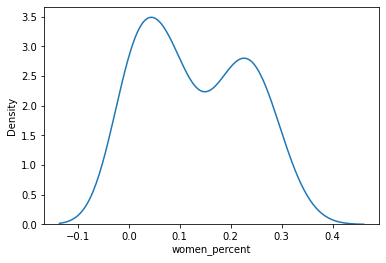

In [94]:
df = athlete_events.copy()
df = df[df['Games']=='1964 Summer']
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='M' else 0)
df1 = 1-df.groupby('NOC').mean()['Sex']
df2 = df.groupby('NOC').count()['Sex']
df = pd.concat([df1,df2],axis=1)
df.columns = ['women_percent','total_count']
df = df[df['total_count']>=20]
print('MEAN-->',np.mean(df['women_percent']))
print('STANDARD DEVIATION-->',np.std(df['women_percent']))
sns.kdeplot(df['women_percent'])
plt.show()

### Womken participation distribution country wise 2016

MEAN--> 0.4321617081903028
STANDARD DEVIATION--> 0.13965461588699435


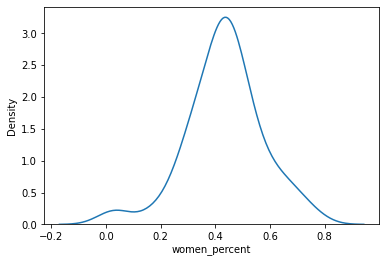

In [93]:
df = athlete_events.copy()
df = df[df['Games']=='2016 Summer']
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='M' else 0)
df1 = 1-df.groupby('NOC').mean()['Sex']
df2 = df.groupby('NOC').count()['Sex']
df = pd.concat([df1,df2],axis=1)
df.columns = ['women_percent','total_count']
df = df[df['total_count']>=20]
print('MEAN-->',np.mean(df['women_percent']))
print('STANDARD DEVIATION-->',np.std(df['women_percent']))
sns.kdeplot(df['women_percent'])
plt.show()

* Checked for 2016 London Olympics and for countries having atleast 20 participants which is the case for 91 out of 206 countries. The countries that come on top with less woman participation are Iraq, Honduras, Qatar, Iran, Algeria most of which are countries that stand low for women rights.
* The countries that send the most people to participate in Olympics such as USA, Brazil, Germany, Australia has almost perfect gender ratios from aroung 43% in France to about 62% in Canada. A thing to notice - all these are countries where woman enjoy equal rights as men.
* The distribution of women participation percebtage is with mean 0.43 and standard deviation of 0.14 with main peak at 0.45 and a small peak at 0. This is much better when compare to 1964 summer olympics which had mean 0.12 and standard deviation 0.10 which is very bad.
* Conclusion: may be debatable - the well developed countries where women enjoy equal rights as that of men fair well in Olympic games. Gender equality is one way to measure the development of your country.

PROMOTE GENDER EQUALITY IN YOUR COUNTRY